## Perceptron

In [75]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [76]:
repetitions = 200

In [77]:
estimate_func_unipolar = lambda v: unipolar(0, v)
x_all_unipolar = reproduce_x_times(x_unipolar, repetitions)
d_all_unipolar = reproduce_x_times(d_unipolar, repetitions)
x_all_unipolar = x_all_unipolar + get_random_except_first_row(x_all_unipolar.shape)
x_all_unipolar[:, :5], d_all_unipolar[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.00429137,  0.01564961,  0.99276483,  1.04645517,  0.0137088 ],
        [ 0.03684184,  1.02579367, -0.01486045,  0.96617515, -0.04498158]]),
 array([[0, 0, 0, 1, 0]]))

In [78]:
estimate_func_bipolar = lambda v: bipolar(0, v)
x_all_bipolar = reproduce_x_times(x_bipolar, repetitions)
d_all_bipolar = reproduce_x_times(d_bipolar, repetitions)
x_all_bipolar = x_all_bipolar + get_random_except_first_row(x_all_bipolar.shape)
x_all_bipolar[:, :5], d_all_bipolar[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.97950017, -1.00753042,  1.04552125,  0.99675787, -0.95756739],
        [-1.03381834,  1.03147741, -0.96590333,  1.00693618, -1.0044934 ]]),
 array([[-1, -1, -1,  1, -1]]))

In [79]:
test_size = int(x_all_unipolar.shape[1] * 0.25)
train_size = int(x_all_unipolar.shape[1] - test_size)

In [80]:
x_train_unipolar, x_test_unipolar = x_all_unipolar[:, :train_size], x_all_unipolar[:, train_size:]
d_train_unipolar, d_test_unipolar = d_all_unipolar[:, :train_size], d_all_unipolar[:, train_size:]
x_train_unipolar.shape, x_test_unipolar.shape, d_train_unipolar.shape, d_test_unipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [81]:
x_train_bipolar, x_test_bipolar = x_all_bipolar[:, :train_size], x_all_bipolar[:, train_size:]
d_train_bipolar, d_test_bipolar = d_all_bipolar[:, :train_size], d_all_bipolar[:, train_size:]
x_train_bipolar.shape, x_test_bipolar.shape, d_train_bipolar.shape, d_test_bipolar.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [82]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [83]:
perceptrons_unipolar = []
perceptrons_bipolar = []
for w_range in list(np.linspace(0, 1, num=100))[1:]:
    p_unipolar = Perceptron(x_train_unipolar, d_train_unipolar, x_test_unipolar, d_test_unipolar, estimate_func_unipolar, 0.1, (-w_range, w_range))
    p_bipolar = Perceptron(x_train_bipolar, d_train_bipolar, x_test_bipolar, d_test_bipolar, estimate_func_bipolar, 0.1, (-w_range, w_range))
    for i in range(experiments_numb):
        p_unipolar.count()
        p_bipolar.count()
    perceptrons_unipolar.append(p_unipolar)
    perceptrons_bipolar.append(p_bipolar)
len(perceptrons_unipolar), len(perceptrons_bipolar)

(99, 99)

,"weights range (-v, v)",epoch count unipolar,epoch count bipolar
0,0.010101,7.11,2.73
1,0.020202,6.38,2.84
2,0.030303,6.75,2.88
3,0.040404,7.06,2.86
4,0.050505,6.73,2.91
5,0.060606,6.85,2.90
6,0.070707,6.56,2.86
7,0.080808,7.01,2.81
8,0.090909,6.80,2.82
9,0.101010,6.93,2.85


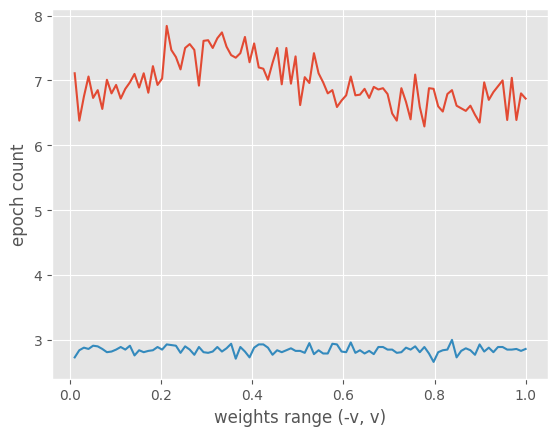

In [84]:
plt.plot([x.wrange[1] for x in perceptrons_unipolar], [x.average_epoch_count for x in perceptrons_unipolar])
plt.plot([x.wrange[1] for x in perceptrons_bipolar], [x.average_epoch_count for x in perceptrons_bipolar])
plt.xlabel("weights range (-v, v)")
plt.ylabel("epoch count")
pd.DataFrame({"weights range (-v, v)":[x.wrange[1] for x in perceptrons_unipolar],
              "epoch count unipolar":[x.average_epoch_count for x in perceptrons_unipolar],
              "epoch count bipolar":[x.average_epoch_count for x in perceptrons_bipolar]}).head(10)

In [85]:
perceptrons_unipolar = []
perceptrons_bipolar = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p_unipolar = Perceptron(x_train_unipolar, d_train_unipolar, x_test_unipolar, d_test_unipolar, estimate_func_unipolar, alfa, (-0.1, 0.1))
    p_bipolar = Perceptron(x_train_bipolar, d_train_bipolar, x_test_bipolar, d_test_bipolar, estimate_func_bipolar, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p_unipolar.count()
        p_bipolar.count()
    perceptrons_unipolar.append(p_unipolar)
    perceptrons_bipolar.append(p_bipolar)
len(perceptrons_unipolar), len(perceptrons_bipolar)

(99, 99)

,alfas,epoch count unipolar,epoch count bipolar
0,0.010101,6.45,2.86
1,0.020202,7.30,2.85
2,0.030303,7.58,2.86
3,0.040404,7.43,2.89
4,0.050505,7.24,2.84
...,...,...,...
94,0.959596,6.73,2.85
95,0.969697,6.79,2.82
96,0.979798,6.68,2.79
97,0.989899,6.83,2.82


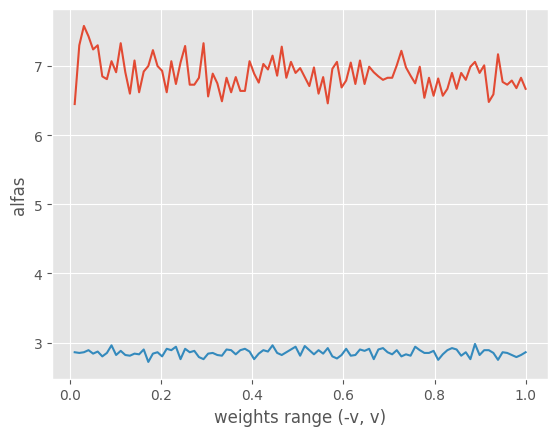

In [86]:
plt.plot([x.alfa for x in perceptrons_unipolar], [x.average_epoch_count for x in perceptrons_unipolar])
plt.plot([x.alfa for x in perceptrons_bipolar], [x.average_epoch_count for x in perceptrons_bipolar])
plt.xlabel("weights range (-v, v)")
plt.ylabel("alfas")
pd.DataFrame({"alfas": [x.alfa for x in perceptrons_unipolar],
              "epoch count unipolar": [x.average_epoch_count for x in perceptrons_unipolar],
              "epoch count bipolar": [x.average_epoch_count for x in perceptrons_bipolar]})